# Problem Statement:

### Web scraping on 'www.tripadvisor.com'. 
### Section: coffee Tea
### Domain select 02451(Waltham)
### The main assignment is to scrape Name, Reviews supposed to have with their Rating with how many stars they have and sentimental analysis on their Reviews. So, extract their main sentences in the Reviews like. “Oh, the food\ is good.” Really shitty and bad customer service”. Then I need data when it is posted. If a customer posted data. Also, when a customer visited. I need everything from this link. Once you finished that I need graphs on how customer reviews increased and positive reviews vs negative review graph. 

# Loading the required libraries

In [58]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from bs4 import BeautifulSoup as soup
import requests
import json
import urllib2
import pandas as pd

# Waltham, MA

### Web scraping performed on the website- 'www.tripadvisor.com' for 'Coffee & Tea' section. The output here are the names of all restaurants under this section  along with their respective hyperlink within the website.

In [2]:
# specify the url
main_url = 'https://www.tripadvisor.com'
quote_page = 'https://www.tripadvisor.com/Restaurants-g41880-zfg9900-Waltham_Massachusetts.html'

# query the website and return the html to the variable ‘page'
uclient = urllib2.urlopen(quote_page)
page_html = uclient.read()
uclient.close()

# parse the html using beautiful soup and store in variable `soup`
page_soup = soup(page_html, 'html.parser')

# Take out the <div> of name and get its value
df = pd.DataFrame(columns=['Title','Link'])

for i in range(1,31):
    
    if (i==1) :
        text = " first"
    else:
        text = ""
    
    link = page_soup.find_all("div",attrs={"class" : "listing rebrand listingIndex-" + str(i) + text})

    link1 = link[0]

    a= link1.div.find("a")
    b= link1.find("a",attrs={"class" : "property_title"})
    name = b.text.strip()
    page_link = main_url + a['href']
    
    df= df.append({'Title': name, 'Link': page_link}, ignore_index=True)

df= df[['Title','Link']]
df.to_csv('coffee_Tea_at_Waltham.csv')


### Get the list of Restaurants and their corresponding links

In [3]:
df

,Title,Link
0,Cafe on the Common,https://www.tripadvisor.com/Restaurant_Review-...
1,The Tea Leaf,https://www.tripadvisor.com/Restaurant_Review-...
2,Dunkin' Donuts,https://www.tripadvisor.com/Restaurant_Review-...
3,Dunkin' Donuts,https://www.tripadvisor.com/Restaurant_Review-...
4,Dunkin' Donuts,https://www.tripadvisor.com/Restaurant_Review-...
5,L'Aroma Cafe and Bakery,https://www.tripadvisor.com/Restaurant_Review-...
6,Starbucks,https://www.tripadvisor.com/Restaurant_Review-...
7,Dunkin' Donuts,https://www.tripadvisor.com/Restaurant_Review-...
8,Dunkin' Donuts,https://www.tripadvisor.com/Restaurant_Review-...
9,L.A. Burdick Handmade Chocolates,https://www.tripadvisor.com/Restaurant_Review-...


### Getting reviews of each Coffee and Tea restaurant for Waltham

In [4]:
df_det = pd.DataFrame(columns=['Name_of_restaurant','overall_rating','no_of_reviews','type_of_cusine', 'Location',
                               'Food_rating','Service_rating', 'Value_rating', 'Atmosphere_rating',
                               'reviewer', 'reviewer_from', 'review_rating','review_date','review_header', 'review_desc'])

for j in range(0,len(df)):
    name = str(df.iloc[j,0])
    res= str(df.iloc[j,1])
    
    uclient = urllib2.urlopen(res)
    page_html = uclient.read()
    uclient.close()
    
    page_soup = soup(page_html, 'html.parser')
    
    info = page_soup.find_all("div",attrs={"class" : "ui_columns is-multiline is-mobile reviewsAndDetails"})
    main_details = page_soup.find_all("div",attrs={"class" : "ui_column is-9"})
    more_details = page_soup.find_all("div",attrs={"class" : "ui_column is-2"})
    i=0
    
    #info
    info_div = info[i]
    info1 = info_div.find("span",attrs={"class" : "overallRating"}).text.strip() 
    info2 = info_div.find("a",attrs={"class" : "seeAllReviews"}).text.strip()[:2] # start from anywhere take 2 characters
    info3 = info_div.find("div",attrs={"class" : "ui_column is-6 cuisines"})
    if info3 == None :
        info3 =''
    else:
        info3 = info3.find("div",attrs={"class" : "text"}).text.strip()
        
    info4 = info_div.find("div",attrs={"class" : "address ui_column is-12"})
    info4 = info4.find("span",attrs={"class" : "street-address"}).text.strip() +", " + info4.find("span",attrs={"class" : "locality"}).text.strip()
    
    r=0
    for info5 in info_div.find_all("div",attrs={"class" : "ui_column is-6"}):
        det = info5.find("span")
        det1 = str(det["class"][1][-2:][-2])+"."+str(det["class"][1][-2:][-1])
        if r==0 :
            Food = det1
        elif r==1 : 
            Service =det1
        elif r==2 : 
            Value =det1
        elif r==3 : 
            Atmosphere =det1
        else :
            0
        r=r+1
    
    
    info6 = page_soup.find_all("div",attrs={"class" : "content_block details_block scroll_tabs"})[0]

    c=0
    for content in info6.find_all("div",attrs={"class" : "content"}):
        if c==2 :
            info7=content.text.strip() #restaurant features
            
        c=c+1
        
        
    for i in range(0,len(main_details)-1):
        
        #main_details
        rating_review=main_details[i]
        
        rating_div= rating_review.find("div",attrs={"class" : "rating reviewItemInline"})
        detail = rating_div.find("span")
        detail1 = str(detail["class"][1][-2:][-2]) + "." + str(detail["class"][1][-2:][-1])
        detail2 = rating_div.find("span",attrs={"class" : "ratingDate relativeDate"}) 
        detail2 = detail2.text.strip()[9:]
        quote = rating_review.find("div",{"class" : "quote"})
        detail3 = str(quote.find("span").text.strip())
        detail4 = rating_review.find("p",attrs={"class" : "partial_entry"})
        if detail4 == None:
            detail4 =''
        else :
            detail4 = detail4.text.strip()
        
        #more-details
        rating_review2=more_details[i]
        detail5= rating_review2.find("span",attrs={"class" : "expand_inline scrname"})
        detail5 = detail5.text.strip()
        detail6 = rating_review2.find("span",attrs={"class" : "expand_inline userLocation"})
        if detail6 == None:
            detail6 = ''
        else :
            detail6 = detail6.text.strip()
            
        df_det= df_det.append({'Name_of_restaurant' :name ,'overall_rating':info1, 'no_of_reviews': info2, 'type_of_cusine': info3,
                               'Location':info4, 'Food_rating' : Food,'Service_rating' : Service, 'Value_rating': Value, 
                                'Atmosphere_rating': Atmosphere, 'reviewer' : detail5, 'reviewer_from' :detail6, 'review_rating' :detail1,'review_date' : detail2
                                ,'review_header':detail3 , 'review_desc':detail4},ignore_index=True)
       
    
df_det.head(20)

,Name_of_restaurant,overall_rating,no_of_reviews,type_of_cusine,Location,Food_rating,Service_rating,Value_rating,Atmosphere_rating,reviewer,reviewer_from,review_rating,review_date,review_header,review_desc
0,Cafe on the Common,4.5,19,Cafe,"677 Main St, Waltham, MA 02451-0600",4.5,4.5,4.5,4.5,Jerome B,"Columbia, Maryland",5.0,"February 11, 2018",Great Place to Hang Out; The Tea and Muffin we...,Stopped in about 10 on a Saturday morning with...
1,Cafe on the Common,4.5,19,Cafe,"677 Main St, Waltham, MA 02451-0600",4.5,4.5,4.5,4.5,Deb255,"Newton, Massachusetts",4.0,"January 28, 2018",Terrific place for coffee!,We had such a nice time at Cafe on the Common....
2,Cafe on the Common,4.5,19,Cafe,"677 Main St, Waltham, MA 02451-0600",4.5,4.5,4.5,4.5,mix579,"Sudbury, MA",3.0,"September 14, 2017",Run of the mill alt coffee place,Nothing to report here. Your average alt coffe...
3,Cafe on the Common,4.5,19,Cafe,"677 Main St, Waltham, MA 02451-0600",4.5,4.5,4.5,4.5,John B,"Waltham, Massachusetts",5.0,"August 9, 2017",Home Away from Home,I can't say enough good things about this loca...
4,Cafe on the Common,4.5,19,Cafe,"677 Main St, Waltham, MA 02451-0600",4.5,4.5,4.5,4.5,Malia K,,5.0,"July 6, 2017",Great coffee shop,I love any coffee shop I can bring my work and...
5,Cafe on the Common,4.5,19,Cafe,"677 Main St, Waltham, MA 02451-0600",4.5,4.5,4.5,4.5,Henry Q,"Waltham, Massachusetts",5.0,"May 23, 2017",first stop,"a good first outing of the weekend, good pastr..."
6,Cafe on the Common,4.5,19,Cafe,"677 Main St, Waltham, MA 02451-0600",4.5,4.5,4.5,4.5,cootmom,Massachusetts,4.0,"February 11, 2017",Delightful atmosphere!,A destination coffee shop with an adjoining ic...
7,Cafe on the Common,4.5,19,Cafe,"677 Main St, Waltham, MA 02451-0600",4.5,4.5,4.5,4.5,Alper C,Maine,4.0,"December 16, 2016",... we're not in Starbucks anymore.,Cafe on the Common is a welcome refuge from th...
8,Cafe on the Common,4.5,19,Cafe,"677 Main St, Waltham, MA 02451-0600",4.5,4.5,4.5,4.5,2diane144,"Boston, Massachusetts",5.0,"April 10, 2016",Best Coffee in Town,This is a great place to hang out with a frien...
9,The Tea Leaf,4.5,12,European,"487 Moody St, Waltham, MA 02453-0402",5.0,5.0,5.0,4.5,kaaato,"Waltham, Massachusetts",5.0,"May 26, 2017",Had a snack and viewed all the goodies and gifts,Stopped by to have coffee and home made goodie...


### Exporting the above data to excel format for tagging the reviews as Negative or Positive

In [6]:
# DF TO EXCEL
from pandas import ExcelWriter

writer = ExcelWriter('Waltham_MA_US.xlsx')
df_det.to_excel(writer,'Sheet1')
writer.save()


## Here is the list of all restaurants

### Please select a cafe, to get the review type distribution graph

In [5]:
Res_list = df_det[['Name_of_restaurant','Location', 'overall_rating']]
Res_list.drop_duplicates()

,Name_of_restaurant,Location,overall_rating
0,Cafe on the Common,"677 Main St, Waltham, MA 02451-0600",4.5
9,The Tea Leaf,"487 Moody St, Waltham, MA 02453-0402",4.5
19,Dunkin' Donuts,"130 Lexington St, Waltham, MA 02452-4633",4.5
22,Dunkin' Donuts,"75 3rd Ave, Waltham, MA 02451-7549",3.5
31,Dunkin' Donuts,"49 River St, Waltham, MA 02453-8345",4.0
34,L'Aroma Cafe and Bakery,"15 Spencer St, Newton, MA 02465-2428",4.5
43,Starbucks,"12 Market Place Dr, Waltham, MA 02451-1059",3.5
49,Dunkin' Donuts,"591 Moody St, Waltham, MA 02453-0507",3.5
50,Dunkin' Donuts,"859 Main St, Waltham, MA 02451-8529",3.0
54,L.A. Burdick Handmade Chocolates,"52 Brattle St, Cambridge, MA 02138-3731",4.5


# Graphical representation of the overall ratings and customer reviews

### Please run the below code and enter Name of the Restaurant - This would provide the overall rating

#### Loading the data with additional column sentiment

In [6]:
data1 = pd.read_csv('Waltham_MA.csv')

#### Importing the necessary libraries for Graph creation and Work Cloud generation

In [7]:
#Loading the required packages

from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output


#### Creating variables to store list of restaurants and their respective locatiions

In [8]:
Restaurant_list = df_det.Name_of_restaurant.drop_duplicates()
Location_list = df_det.Location.drop_duplicates()

#### Loading the required libraries for 'Ipy Widget' handling

In [9]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import widgets 

from ipywidgets import HBox, Label

#### User defined code for getting restaurant and location data from the user defined function 'g' and pushing the inputs to generate the sentiment Frequency Plot

In [10]:
def f(Restaurant,Location):
    res_subset = data1[(data1['Name_of_restaurant']==Restaurant) & (data1['Location']==Location)]
    
    print('Total No. of Reviews:')
    print(len(res_subset))
    
    res_sub=res_subset[['reviewer','Sentiment']]
    group_by_review_type = res_sub.groupby(['Sentiment']).count()
    
    #plot for comparing total number of accidents in rural and urban areas
    ax=group_by_review_type.plot.bar(color=["#BDB76B"],width=0.3,rot=2,legend=False)
    ax.set_ylabel('No of Reviews')
    ax.set_xlabel('Type of Review')
    plt.title("Distribution of reviews across review Type",y=1.2)

 #### User defined function to produce the interact widget and gather user input. This input is sent to the above user defined function

In [11]:
def g(Restaurant):
    res_subset = data1[(data1['Name_of_restaurant']==Restaurant)]
    style = {'description_width': 'initial'}
    location_list = res_subset.Location.drop_duplicates()
    print("Please Select the location for the given restaurant:")
    interact(f, Restaurant=Restaurant, Location= location_list)


#### Running the below code to produce interact widget for collecting user inputs and generating the Sentiment Frequency plot

In [38]:

print("Please Select the restaurant:")
interact(g, Restaurant= Restaurant_list);

Please Select the restaurant:


interactive(children=(Dropdown(description=u'Restaurant', options=('Cafe on the Common', 'The Tea Leaf', "Dunkin' Donuts", "L'Aroma Cafe and Bakery", 'Starbucks', 'L.A. Burdick Handmade Chocolates', 'George Howell Coffee', 'Coffee Kiosk at Boston Marriott Newton', 'Crema Cafe', 'Bellmont Caffe', 'Fleck Coffee', "Peet's Coffee & Tea"), value='Cafe on the Common'), Output()), _dom_classes=('widget-interact',))

# Sentiment Analysis - Word Cloud Representation

#### Loading the data containing customer sentiment and retrieving descriptions and sentiments column

In [39]:
data = pd.read_csv('Waltham_MA.csv')
data = data[['review_desc','Sentiment']]

#### Creating test and train data set for the model

In [40]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.Sentiment != "Neutral"]

## Distribution of Positive and Negative words 

Positive words


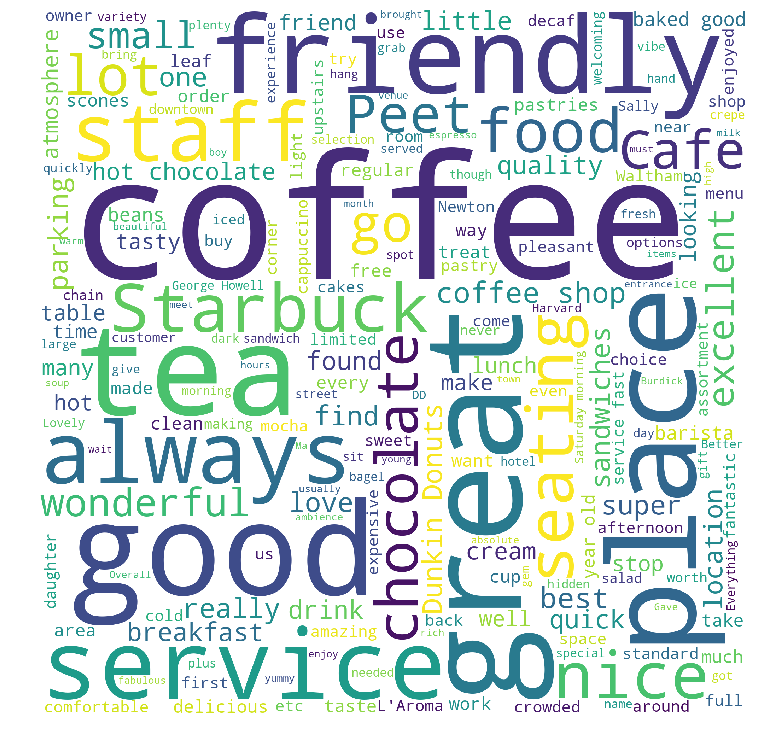

Negative words


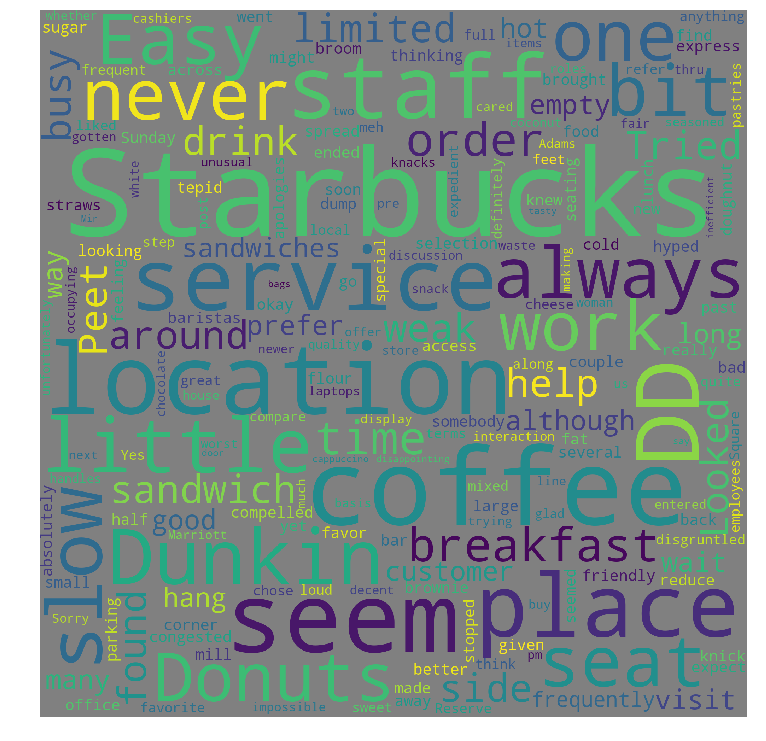

In [41]:
train_for_positive_review = train[ train['Sentiment'] == 'Positive']
train_for_positive_review = train_for_positive_review['review_desc']
train_for_negative_review = train[ train['Sentiment'] == 'Negative']
train_for_negative_review = train_for_negative_review['review_desc']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    proper_words = " ".join([word for word in words.split()
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2000,
                      height=2000
                     ).generate(proper_words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_for_positive_review,'white')
print("Negative words")
wordcloud_draw(train_for_negative_review,'grey')

### In order to get a wordcloud of all the relevant words, the below method helps to remove all the hashtags, mentions, links and stopwords from the training set.

### Stop Word: Stop Words are are like 'the', 'for', etc. which do not carry any significance to be used in Search Queries, hence those are also removed.

In [42]:
reviews = []
stopwords_set = set(stopwords.words("english"))

In [44]:

for index, row in train.iterrows():
    a=row
    a='"'+a[0]+ '"'
    words_filtered = [e.lower() for e in a.split() if len(e) >= 3]
    proper_words = [word for word in words_filtered]
    words_without_stopwords = [word for word in proper_words if not word in stopwords_set]
    reviews.append((proper_words,row.Sentiment))


#### Filtering data based on Positive and Negative matrix

In [45]:
test_positive_words = test[ test['Sentiment'] == 'Positive']
test_positive_words = test_positive_words['review_desc']
test_negative_words = test[ test['Sentiment'] == 'Negative']
test_negative_words = test_negative_words['review_desc']

#### Creating user defined functions to remove stop words from analysis

In [53]:

# Extracting word features
def get_words_in_reviews(reviews):
    all = []
    for (words, sentiment) in reviews:
        all.extend(words)
    return all


def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
word_features = get_word_features(get_words_in_reviews(reviews))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['containts(%s)' % word] = (word in document_words)
    return features


## Word Cloud to show distribution of all words

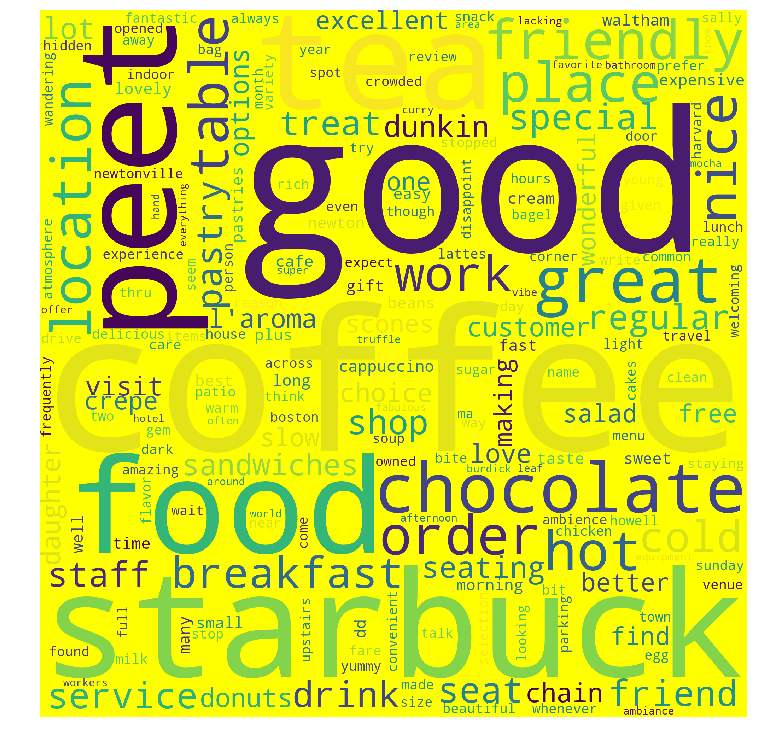

In [54]:
wordcloud_draw(word_features,'yellow')

## Score for classifier algorithm

In [55]:
# Training the Naive Bayes classifier
training_data_set = nltk.classify.apply_features(extract_features,reviews)
classifier = nltk.NaiveBayesClassifier.train(training_data_set)

#### Getting the results from Classifier Algorithm

In [57]:
negative_count = 0
positive_count = 0
for obj in test_negative_words: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        negative_count = negative_count + 1
for obj in test_positive_words: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        positive_count = positive_count + 1
        
print('[Negative]: %s/%s '  % (len(test_negative_words),negative_count))        
print('[Positive]: %s/%s '  % (len(test_positive_words),positive_count))  

[Negative]: 3/0 
[Positive]: 9/9 
